In [181]:
import pandas as pd
heart_diseases = pd.read_csv('datasets/heart_diseases.csv')
heart_diseases.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [182]:
# creating data for the model/estimator/algorithm

X = heart_diseases.drop('target',axis=1)

y = heart_diseases['target']

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
forest_clf = RandomForestClassifier()

In [192]:
forest_clf.get_params()  

# these parameters are called hyperparameters which are tuned later to optimize the classifier

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## why .values is used ??

If used, model get trained only with the values without the feature names.

In [219]:
forest_clf.fit(X_train.values,y_train.values)

RandomForestClassifier()

## predicting single values

In [220]:
forest_clf.predict([X_test.loc[56]])

array([1])

In [233]:
forest_clf.score(X_train.values,y_train)  

1.0

In [227]:
forest_clf.score(X_test.values,y_test)

0.8852459016393442

In [234]:
y_preds = forest_clf.predict(X_test.values)

# Evaluation methods

score method is deafult evaluation criterion for each estimator method

for further evaluaiton following methods are used.

In [232]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [236]:
print(classification_report(y_true=y_test,y_pred=y_preds))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.89      0.86      0.88        29

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [237]:
confusion_matrix(y_true=y_test,y_pred=y_preds)

array([[29,  3],
       [ 4, 25]])

In [238]:
accuracy_score(y_test,y_preds)

0.8852459016393442

if not satisfied with the results, try improving the model

let's improve the model by tuning the parameters

tuning the n_estimators hyperparameter of the RandomForestClassifier (n_estimators :: number of trees used)

In [243]:
np.random.seed(42)
for i in range(10,100,10):
    print(f'Trying model with {i} estimators...')
    fr_clf = RandomForestClassifier(n_estimators=i).fit(X_train.values,y_train)
    print(f'Model test accuracy {fr_clf.score(X_test.values,y_test)*100:.2f}')

Trying model with 10 estimators...
Model test accuracy 85.25
Trying model with 20 estimators...
Model test accuracy 86.89
Trying model with 30 estimators...
Model test accuracy 86.89
Trying model with 40 estimators...
Model test accuracy 90.16
Trying model with 50 estimators...
Model test accuracy 85.25
Trying model with 60 estimators...
Model test accuracy 88.52
Trying model with 70 estimators...
Model test accuracy 86.89
Trying model with 80 estimators...
Model test accuracy 88.52
Trying model with 90 estimators...
Model test accuracy 85.25


## Getting data ready for training:
    split data into `features 'X' ` and `labels 'y' `
    work with the missing values (also called `imputing` values)
    convert non-numeric values to numeric values(`Feature Encoding`)

In [244]:
heart_diseases.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [247]:
X = heart_diseases.drop(['target'],axis=1)

In [248]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [249]:
y = heart_diseases['target']

In [253]:
pwd

'/Users/nirajanpaudel17/Documents/Python/Python NoteBooks/Book Files'

In [262]:
car_sales = pd.read_csv('datasets/car_sales.csv')

In [263]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [267]:
X = car_sales.drop('Price',axis=1)

In [269]:
y = car_sales['Price']

In [280]:
# changing non numeric data columns into numeric data
# we will change Make Colour and Doors columns to numeric data(categorical data)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)],remainder='passthrough')

transformed_X = transformer.fit_transform(X)

In [285]:
# now let's fit the model with the transformed data

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=42)

In [286]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,y_train)

RandomForestRegressor()

In [289]:
forest_reg.score(X_test,y_test)

0.3111523814478908

In [290]:
car_sales_missing = pd.read_csv('datasets/car_sales_missing.csv')

In [291]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [302]:
car_sales_missing['Doors'].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [299]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [303]:
# now let's fill the missing values

car_sales_missing['Make'].fillna('missing',inplace=True)

car_sales_missing['Colour'].fillna('missing',inplace=True)

car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

car_sales_missing['Doors'].fillna(4, inplace=True)

In [305]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [307]:
# drop the values that doesnot have the price label or the missing price values

car_sales_missing.dropna(inplace=True)

In [308]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [312]:
X = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [314]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [343]:
one_hot = OneHotEncoder()
categorical_data = ['Make', 'Colour', 'Doors']

transformer = ColumnTransformer([('one_hot',one_hot,categorical_data)],remainder='passthrough')

transformed_X = transformer.fit_transform(X)

In [345]:
transformed_X

<950x16 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

## option 2 : Fill missing values using scikit learn

In [317]:
car_sales_missing = pd.read_csv('datasets/car_sales_missing.csv')

In [319]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [331]:
# All the rows having price column NaN values are removed

car_sales_missing.dropna(subset='Price',inplace=True)

In [332]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [339]:
X = car_sales_missing.drop(['Price'],axis=1)

y = car_sales_missing['Price']

In [341]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [342]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [346]:
# Now let's impute the missing values using the scikitlearn method. Above, we did it with pandas

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [347]:
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4) # it is considered as categorical feature
num_imputer = SimpleImputer(strategy='mean')

categorical_features = ['Make', 'Colour']
door_feature = ['Doors']
num_feature = ['Odometer (KM)']

# remember, before columntransfomer was used to encode non numeric data to numeric.
# think columntransformer as pipeline to do the task

imputer = ColumnTransformer([('cat_imputer', cat_imputer, categorical_features),
                                ('door_imputer', door_imputer, door_feature),
                                ('num_imputer', num_imputer, num_feature)])

In [349]:
imputed_X = imputer.fit_transform(X)

In [357]:
car_sales_filled = pd.DataFrame(data=imputed_X,columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])

In [362]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [363]:
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [366]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']

one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)],remainder='passthrough')

transformed_car_sales = transformer.fit_transform(car_sales_filled)

In [370]:
type(transformed_car_sales)

scipy.sparse._csr.csr_matrix

In [372]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_car_sales, y, test_size=0.2)
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,y_train)

RandomForestRegressor()

In [380]:
y.iloc[0]

15323.0

In [375]:
forest_reg.predict(X_test[0])

array([17256.07])

In [381]:
forest_reg.score(X_test,y_test)

0.21990196728583944

In [395]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [386]:
type(housing)

sklearn.utils.Bunch

In [396]:
housing_df = pd.DataFrame(data=housing['data'],columns=housing['feature_names'])

In [397]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


the above dataframe do not have target column. let's create a `target` variable from above dictionary.

In [406]:
housing_df['target'] = housing['target']

In [407]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [409]:
housing_df.drop('MedHouseVal',axis=1,inplace=True)

In [413]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [415]:
housing_df.isna().sum() # no missing data present

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [418]:
# now let's split the data into train and test set

X = housing_df.drop(['target'],axis=1)
y = housing['target']

In [419]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [475]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train.values,y_train)

RandomForestRegressor()

In [471]:
type(X_test.loc[0])

pandas.core.series.Series

In [476]:
forest_reg.predict([X_test.loc[0]])

array([4.2420829])

In [477]:
forest_reg.score(X_test.values,y_test)

0.8071841741528625

Now let's try the heart_diseases problem with `linear_SVC` model.

In [478]:
heart_disease = pd.read_csv('datasets/heart_diseases.csv')

In [479]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [480]:
X, y = heart_disease.drop(['target'],axis=1), heart_disease['target']

In [496]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [510]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

In [528]:
forest_clf.fit(X_train.values,y_train)

RandomForestClassifier()

In [537]:
y_preds = forest_clf.predict(X_test.values)

In [538]:
y_test.to_numpy()

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [539]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [546]:
np.array(y_test-y_preds)

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0, -1,  0,  0, -1, -1,  0,  0,  0,  1,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0])

In [548]:
forest_clf.predict_proba(X_test[:3].values)

array([[0.9 , 0.1 ],
       [0.37, 0.63],
       [0.49, 0.51]])

In [551]:
forest_clf.predict(X_test[:3].values)

array([0, 1, 1])

In [553]:
y_test[:3].to_numpy()

array([0, 0, 1])

In [554]:
from sklearn.model_selection import cross_val_score

In [557]:
forest_clf.score(X_test.values,y_test)

0.82

In [627]:
np.mean(cross_val_score(forest_clf,X,y,cv=5,scoring='recall'))

0.8606060606060606

In [559]:
from sklearn.metrics import roc_curve

In [599]:
pred_probas = forest_clf.predict_proba(X_test.values)

In [600]:
# forest_clf.predict(X_test.values)

In [601]:
from sklearn.metrics import roc_curve

In [602]:
fpr, tpr, thresholds = roc_curve(y_test, pred_probas[:, 1])

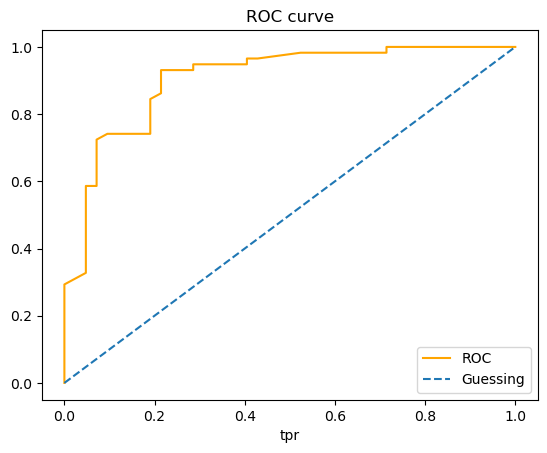

In [604]:
# function to plot the ROC curve

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],linestyle='--',label='Guessing')
    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('fpr')
    plt.xlabel('tpr')
    
    
plot_roc_curve(fpr,tpr)

In [606]:
from sklearn.metrics import roc_auc_score  

In [608]:
roc_auc_score(y_test,pred_probas[:, 1])

0.9051724137931034

In [623]:
from sklearn.metrics import confusion_matrix
conf_max = confusion_matrix(y_test,y_preds)

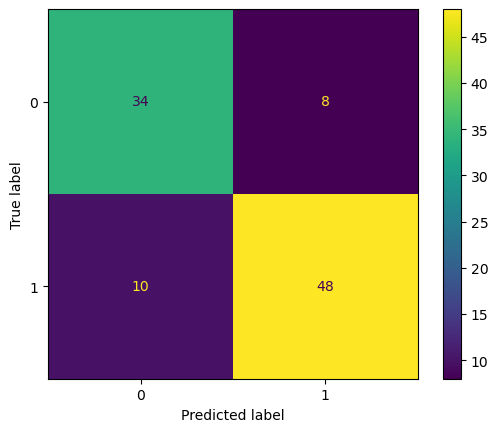

In [624]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_preds)

In [619]:
pd.crosstab(y_test,y_preds)

col_0,0,1
target,,
0,34,8
1,10,48


<AxesSubplot:>

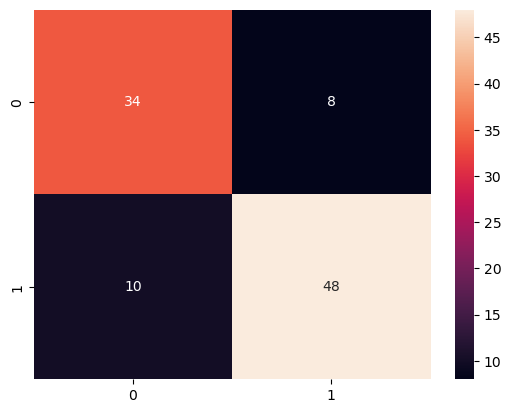

In [621]:
import seaborn as sns

sns.heatmap(conf_max,annot=True)

In [622]:
import sklearn

sklearn.__version__

'1.0.2'

In [629]:
forest_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### A random forest classifier.

* A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples
of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise 
the whole dataset is used to build each tree.

In [635]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score

In [695]:
def evaluate_preds(y_true,y_preds):
#     we are evaluating a classification model
    
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    metric_dict = {'accuracy':round(accuracy,2), 'precision':round(precision,2), 'recall':round(recall,2),
                   'f1':round(f1,2)}
    
    print(f'accuracy: {accuracy*100:.2f}%')
    print(f'precision: {precision:2f}')
    print(f'recall: {recall:2f}')
    print(f'f1_score: {f1:.2f}')
    
    return metric_dict
    

In [726]:
heart_disease_shuffled = heart_diseases.sample(frac=1,random_state=42)

X , y = heart_disease_shuffled.drop(['target'],axis=1), heart_disease_shuffled['target']

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()

clf.fit(X_train,y_train)

y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid,y_preds)

accuracy: 82.22%
precision: 0.814815
recall: 0.880000
f1_score: 0.85


now let's try second classifier with other set of hyoerparameters

In [727]:
clf_2 = RandomForestClassifier(n_estimators=10000)

clf_2.fit(X_train,y_train)

y_preds_2 = clf_2.predict(X_valid)

by_hand_metrics = evaluate_preds(y_valid,y_preds_2)

accuracy: 82.22%
precision: 0.814815
recall: 0.880000
f1_score: 0.85


Trying different sets of data by hand is tidious job.
We can use `RandomizedSearchCV` to search the optimized hypermarameter values.

In [728]:
from sklearn.model_selection import RandomizedSearchCV

In [729]:
grid = {
    'n_estimators':[200,300,500,1000,1500],
    'max_depth': [None,5,10,20,40],
    'max_features': ['auto','sqrt'],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2,4]
}

clf_3 = RandomForestClassifier(random_state=42)

rs_clf = RandomizedSearchCV(estimator=clf_3,param_distributions=grid,n_iter=10,cv=5,verbose=1)

rs_clf.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 5, 10, 20, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [200, 300, 500, 1000,
                                                         1500]},
                   verbose=1)

In [730]:
rs_clf.best_params_  # best parameters found in above randomizedsearch

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 5}

In [731]:
y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test,y_preds)

accuracy: 82.61%
precision: 0.840000
recall: 0.840000
f1_score: 0.84


In [732]:
from sklearn.model_selection import GridSearchCV

grid_2 = {
    'n_estimators':[200,300],
    'max_depth': [None,5],
    'max_features': ['auto','sqrt'],
    'min_samples_split': [4,6],
    'min_samples_leaf': [2]
}

clf_3 = RandomForestClassifier(random_state=42)

gs_clf = GridSearchCV(estimator=clf_3,param_grid=grid_2,cv=5,verbose=1)

gs_clf.fit(X_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2], 'min_samples_split': [4, 6],
                         'n_estimators': [200, 300]},
             verbose=1)

In [737]:
gs_preds = gs_clf.predict(X_test)

In [740]:
gs_metrics = evaluate_preds(y_test,gs_preds)

accuracy: 82.61%
precision: 0.869565
recall: 0.800000
f1_score: 0.83


In [734]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 200}

Now, we have 4 metrics 

* baseline_metrics
* by_hand_metrics
* rs_metrics
* gs_metrics

In [741]:
compare_frame = pd.DataFrame({
    'baseline': baseline_metrics,
    'by_hand': by_hand_metrics,
    'rs_metrics': rs_metrics,
    'gs_metrics': gs_metrics
})

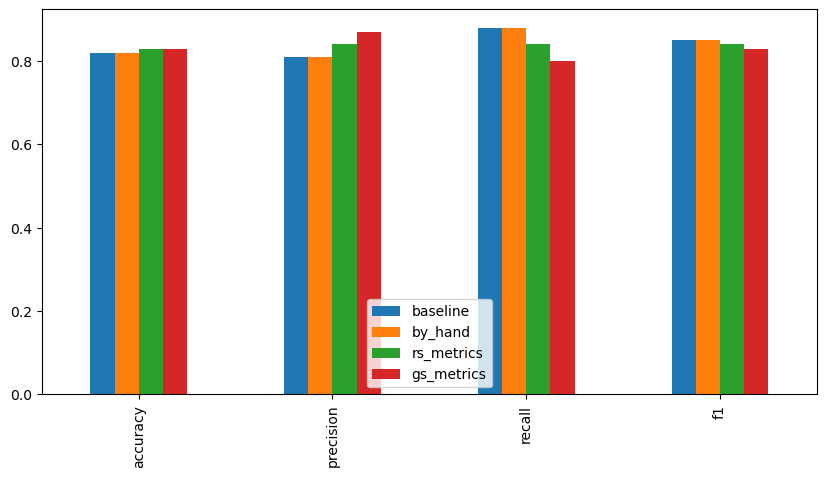

In [753]:
compare_frame.plot.bar(figsize=(10,5));

#### In machine learning models, there should be correlation between the dependent and the independent varible
#### but it might not be good if the `FEATURES` are highly correlated.

  * We remove the features that are highly correlated for various purposes(like, reducing complexity....)

In [758]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

import numpy as np
np.random.seed(42)

data = pd.read_csv('datasets/car_sales_missing.csv')
data.dropna(subset=['Price'],inplace=True)

categorical_features = ['Make','Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('one_hot',OneHotEncoder(handle_unknown='ignore'))])

door_features = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value=4))])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'))])

preprocessor = ColumnTransformer(transformers=[
    ('cat',categorical_transformer,categorical_features),
    ('door',door_transformer,door_features),
    ('num',numeric_transformer,numeric_features)])

model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor())])

X = data.drop(['Price'],axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [757]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

In [761]:
# Now, for the hyperparameter tuning 

from sklearn.model_selection import GridSearchCV

grid_new = {
    'preprocessor__num__imputer__strategy':['mean','median'],
    'model__n_estimators':[100,1000],
    'model__max_depth':[None,5],
    'model__min_samples_split':[2,4]
}

gs_model = GridSearchCV(estimator=model,param_grid=grid_new,cv=5,verbose=0)
gs_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
        

In [760]:
gs_model.score(X_test,y_test)

0.32781807610470093